# **Section A - Training a simple CNN**

In [1]:
!pip install -q tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 1.4MB/s 
     |████████████████████████████████| 61kB 22.6MB/s 
     |████████████████████████████████| 419kB 55.4MB/s 
     |████████████████████████████████| 3.0MB 33.9MB/s 


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [3]:
# Section 1
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#print some info on the dataset
print('Train set size:{}'.format(train_labels.size))
print('Test set size:{}'.format(test_labels.size))

11493376/11490434 [==============================] - 0s 0us/step
Train set size:60000
Test set size:10000


In [0]:
# Section 1
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [0]:
# Section 1
#scale the images to the range of [0,1] and adjust the shape
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images / 255.0

test_images = test_images / 255.0

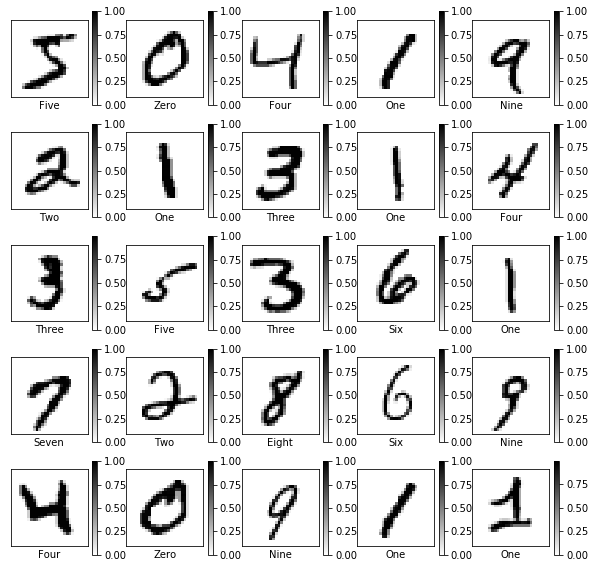

In [6]:
# Section 1
#some ploting to verify the datas range and to get some sensation of it
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,:,:,-1], cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Section 2
#define the layers of the network as requested in the pdf.
def init_architecutre():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(8, (3,3), strides=(1, 1), padding='same',
                            input_shape=(28, 28, 1)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
      tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
      tf.keras.layers.Conv2D(32, (3,3), strides=(1, 1), padding='same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10,  activation='softmax')
  ])
  return model

In [0]:
# Section 3
#set the keras 'SGD' optimizer to use the momentum method mentioned in the pdf
model = init_architecutre()
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Section 4
BATCH_SIZE = 128
EPOCHS = 8
validation_split_ratio = 1.0 / 12.0
#train the CNN

history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=validation_split_ratio)

Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 32s 583us/sample - loss: 0.1641 - accuracy: 0.9506 - val_loss: 0.1353 - val_accuracy: 0.9638
Epoch 2/8
55000/55000 [==============================] - 31s 571us/sample - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0459 - val_accuracy: 0.9876
Epoch 3/8
55000/55000 [==============================] - 33s 606us/sample - loss: 0.0437 - accuracy: 0.9870 - val_loss: 0.0451 - val_accuracy: 0.9880
Epoch 4/8
55000/55000 [==============================] - 31s 566us/sample - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 5/8
55000/55000 [==============================] - 34s 626us/sample - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0516 - val_accuracy: 0.9838
Epoch 6/8
55000/55000 [==============================] - 31s 566us/sample - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0423 - val_accuracy: 0.9882
Epoch 7/8
55000/55000 [============================

In [0]:
def plot_loss_accuracy(history, lr):
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss lr = {}'.format(lr))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.grid(True)

  #plot the accuracy of the train set and the validation set as a function of the 
  # iteration
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy lr = {}'.format(lr))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.grid(True)
  
  plt.show()

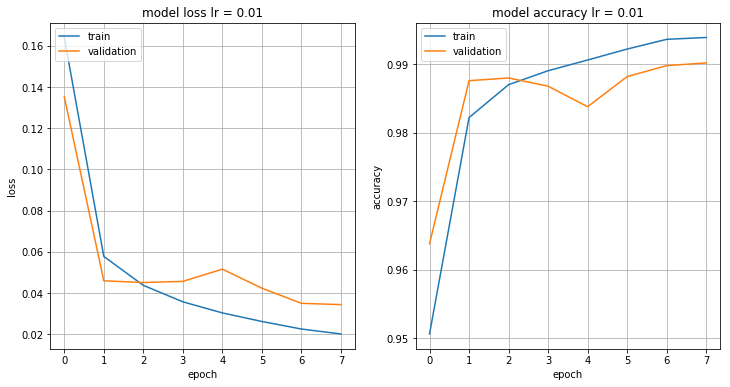

In [12]:
# Section 5
#plot the loss of the train set and the validation set as a function of the 
# iteration
lr = 0.01
plot_loss_accuracy(history, lr)

In [13]:
# Section 6 - evaluate the net on the test set.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 247us/sample - loss: 0.0322 - accuracy: 0.9892
Test loss: 0.03216941492477199
Test accuracy: 0.9892


In [14]:
# Section 7 repeat section 4-5 with LR of 0.1 - big
model2 = init_architecutre()
sgd_big_lr = keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd_big_lr,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set some constants
BATCH_SIZE = 128
EPOCHS = 8
validation_split_ratio = 1.0 / 12.0

#train the CNN

history2 = model2.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=validation_split_ratio)



Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 35s 636us/sample - loss: 0.2654 - accuracy: 0.9317 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 2/8
55000/55000 [==============================] - 32s 589us/sample - loss: 0.0809 - accuracy: 0.9741 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 3/8
55000/55000 [==============================] - 34s 615us/sample - loss: 0.0661 - accuracy: 0.9789 - val_loss: 0.0896 - val_accuracy: 0.9756
Epoch 4/8
55000/55000 [==============================] - 34s 610us/sample - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.0769 - val_accuracy: 0.9776
Epoch 5/8
55000/55000 [==============================] - 32s 587us/sample - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0691 - val_accuracy: 0.9804
Epoch 6/8
55000/55000 [==============================] - 34s 627us/sample - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 7/8
55000/55000 [============================

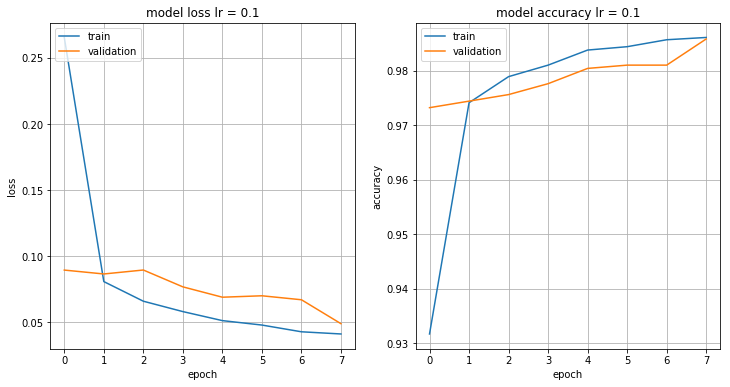

In [15]:
# Section 7 repeat section 4-5 with LR of 0.1 - big

lr = 0.1
plot_loss_accuracy(history2, lr)

In [16]:
# Section 7 repeat section 4-5 with LR of 0.001 - small
model3 = init_architecutre()
sgd_small_lr = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(optimizer=sgd_small_lr,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set some constants
BATCH_SIZE = 128
EPOCHS = 8
validation_split_ratio = 1.0 / 12.0

#train the CNN

history3 = model3.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=validation_split_ratio)



Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 34s 615us/sample - loss: 0.4821 - accuracy: 0.8705 - val_loss: 0.4388 - val_accuracy: 0.8964
Epoch 2/8
55000/55000 [==============================] - 34s 612us/sample - loss: 0.1657 - accuracy: 0.9552 - val_loss: 0.1054 - val_accuracy: 0.9728
Epoch 3/8
55000/55000 [==============================] - 34s 620us/sample - loss: 0.1209 - accuracy: 0.9671 - val_loss: 0.0872 - val_accuracy: 0.9794
Epoch 4/8
55000/55000 [==============================] - 32s 583us/sample - loss: 0.0994 - accuracy: 0.9723 - val_loss: 0.0753 - val_accuracy: 0.9826
Epoch 5/8
55000/55000 [==============================] - 34s 622us/sample - loss: 0.0862 - accuracy: 0.9757 - val_loss: 0.0701 - val_accuracy: 0.9830
Epoch 6/8
55000/55000 [==============================] - 34s 623us/sample - loss: 0.0775 - accuracy: 0.9783 - val_loss: 0.0661 - val_accuracy: 0.9836
Epoch 7/8
55000/55000 [============================

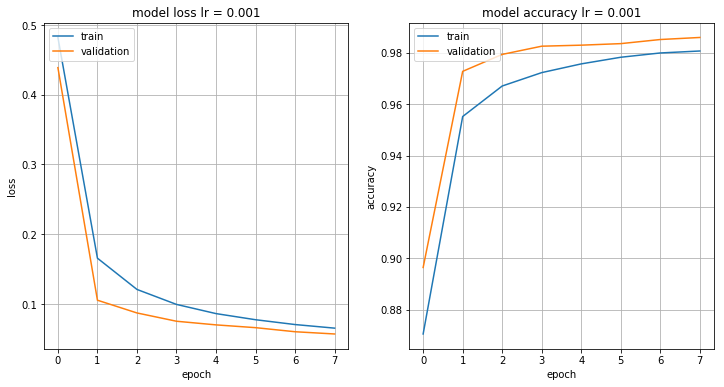

In [17]:
# Section 7 repeat section 4-5 with LR of 0.001 - small
lr = 0.001
plot_loss_accuracy(history3, lr)

In [18]:
# convert the labels to 'one hot' vectors using the to_categorical function
num_classes = 10
categorical_train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
print('train lables size = {}'.format(train_labels.shape))
print('categorical train lables size = {}'.format(categorical_train_labels.shape))
#categorical_test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

train lables size = (60000,)
categorical train lables size = (60000, 10)


In [19]:
# Section 7 repeat section 3-5 with LR of 0.01 - regular and lose - L2 norm


model4 = init_architecutre()
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['accuracy'])

# Set some constants
BATCH_SIZE = 128
EPOCHS = 8
validation_split_ratio = 1.0 / 12.0

#train the CNN

history4 = model4.fit(train_images, categorical_train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=validation_split_ratio)

Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 33s 607us/sample - loss: 0.0332 - accuracy: 0.7790 - val_loss: 0.0163 - val_accuracy: 0.9414
Epoch 2/8
55000/55000 [==============================] - 33s 591us/sample - loss: 0.0108 - accuracy: 0.9404 - val_loss: 0.0066 - val_accuracy: 0.9644
Epoch 3/8
55000/55000 [==============================] - 36s 648us/sample - loss: 0.0079 - accuracy: 0.9549 - val_loss: 0.0054 - val_accuracy: 0.9694
Epoch 4/8
55000/55000 [==============================] - 33s 591us/sample - loss: 0.0066 - accuracy: 0.9622 - val_loss: 0.0046 - val_accuracy: 0.9724
Epoch 5/8
55000/55000 [==============================] - 34s 620us/sample - loss: 0.0058 - accuracy: 0.9669 - val_loss: 0.0041 - val_accuracy: 0.9750
Epoch 6/8
55000/55000 [==============================] - 32s 583us/sample - loss: 0.0052 - accuracy: 0.9702 - val_loss: 0.0039 - val_accuracy: 0.9758
Epoch 7/8
55000/55000 [============================

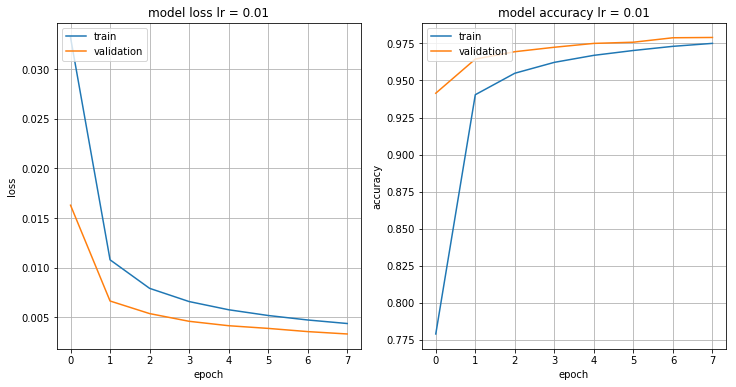

In [20]:
# Section 7 repeat section 3-5 with LR of 0.01 - regular and lose - L2 norm
lr = 0.01
plot_loss_accuracy(history4, lr)

In [0]:
# Section 8 - repeat sections 2-5 with the following architecture
# 8.2
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(2, (3,3), strides=(1, 1), padding='same',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(4, (3,3), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(8, (3,3), strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,  activation='softmax')
])

In [22]:
# 8.3
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 8.4
BATCH_SIZE = 128
EPOCHS = 8
validation_split_ratio = 1.0 / 12.0
#train the CNN

history5 = model5.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=validation_split_ratio)

Train on 55000 samples, validate on 5000 samples
Epoch 1/8
55000/55000 [==============================] - 21s 383us/sample - loss: 0.3040 - accuracy: 0.9074 - val_loss: 0.1122 - val_accuracy: 0.9678
Epoch 2/8
55000/55000 [==============================] - 21s 374us/sample - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 3/8
55000/55000 [==============================] - 21s 376us/sample - loss: 0.0963 - accuracy: 0.9700 - val_loss: 0.0727 - val_accuracy: 0.9798
Epoch 4/8
55000/55000 [==============================] - 23s 417us/sample - loss: 0.0843 - accuracy: 0.9741 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 5/8
55000/55000 [==============================] - 20s 369us/sample - loss: 0.0770 - accuracy: 0.9760 - val_loss: 0.0760 - val_accuracy: 0.9786
Epoch 6/8
55000/55000 [==============================] - 23s 422us/sample - loss: 0.0712 - accuracy: 0.9773 - val_loss: 0.0666 - val_accuracy: 0.9814
Epoch 7/8
55000/55000 [============================

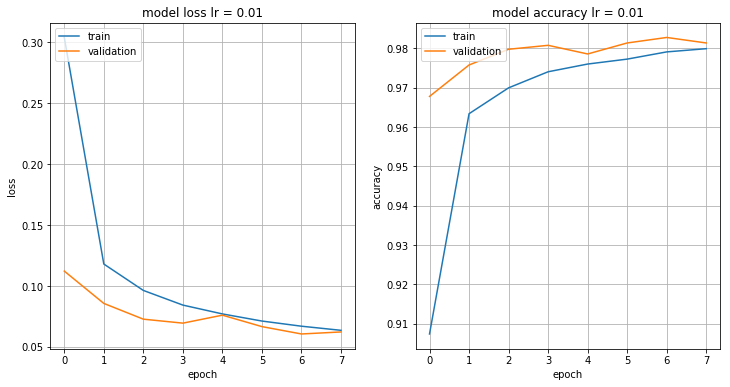

In [23]:
# 8.5
lr = 0.01
plot_loss_accuracy(history5, lr)

In [24]:
test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)
print('Test loss:', test_loss5)
print('Test accuracy:', test_acc5)

10000/10000 [==============================] - 2s 235us/sample - loss: 0.0589 - accuracy: 0.9809
Test loss: 0.05887255742978305
Test accuracy: 0.9809
